In [1]:
import rastereasy

# Read geoimage

In `rastereasy`, one of the main class to deal with georeferenced images is `Geoimage`. It contains the main functions (for resampling, reprojection, stack, plotting, ...). Let's start by opening and plotting an image, some bands or making color compositions

# Open an image

In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)

In [3]:
# Alternatively, we can give names to bands
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
image_names=rastereasy.Geoimage(name_im,names=names)

# Read some informations

## General information

The function `ìnfo()` gives general informations on the opened image

In [4]:
image.info()
image_names.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




The function `get_meta()` outputs rasterio metadata

In [5]:
image_names.get_meta()

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 1000,
 'height': 1000,
 'count': 12,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32637"]]'),
 'transform': Affine(10.0, 0.0, 427690.0,
        0.0, -10.0, 783330.0)}

To get some more useful information

In [6]:
print('number of bands = ',image.nb_bands)
print('shape = ',image.shape)
print('spatial resolution = ',image.resolution)
print('lat / lon of central pixel = ',image.get_latlon_coordinates())

number of bands =  12
shape =  (1000, 1000)
spatial resolution =  10.0
lat / lon of central pixel =  (7.040995989630969, 38.39058840260843)


## Values in bands, row, col, min, max, std, mean for all the image, by bands, ...

In [7]:
help(image.min)
print('Overall minimum of the image : ',image.min(),'\n')
help(image.max)
print('Maximum  of the image for each band: ', image.max(axis = 'band'),'\n')
help(image.std)
print('Standard deviation  of the image along the lines: ',image.std(axis = 'row'),'\n')
help(image.mean)
print('Overall mean  of the image along the lines: ',image.mean(),'\n')
print('Mean  of the image along the bands: ',image.mean(axis='band'),'\n')


Help on method min in module rastereasy.rastereasy:

min(axis=None) method of rastereasy.rastereasy.Geoimage instance
    Calculate the minimum value along a specified axis.

    Parameters
    ----------
    axis : {'band', 'row', 'col', None}, optional
        The axis along which to compute the minimum:
        - 'band': Minimum across spectral bands for each pixel
        - 'row': Minimum across rows (lines) for each band and column
        - 'col': Minimum across columns for each band and row
        - None: Global minimum of the entire image
        Default is None.

    Returns
    -------
    float or numpy.ndarray
        - If axis=None: A single value representing the global minimum
        - If axis='band': Array with shape (nb_rows,nb_cols) containing  mins along bands
        - If axis='row': Array with shape (nb_bands,nb_cols) containing mins along rows
        - If axis='col': Array with shape (nb_bands,nb_rows) containing  mins along cols
        - If axis='pixel': Arra

In [8]:
# Extract the 30th line
image[30,:]

array([[ 434,  434,  434, ...,  230,  230,  230],
       [ 394,  538,  580, ...,  253,  249,  259],
       [ 748,  858,  913, ...,  516,  520,  508],
       ...,
       [3297, 3297, 3297, ...,  198,  198,  198],
       [2221, 2630, 2630, ...,  172,  172,  171],
       [1237, 1590, 1590, ...,  134,  134,  139]],
      shape=(12, 1000), dtype=int16)

In [9]:
# all spectral values in a given pixel
row=20
col=10
print('spectral values in',row,',',col,' : ',image[row,col])
print('size of all spectral values in row',row,':', image[row,:].shape)
print('size of all spectral values in col',col,':', image[:,col].shape)
# check consistency
pixel_row = 15
pixel_col = 22
print('diff with table with values at row ',row,' in pixel col',pixel_col,':', image[row,:][:,pixel_col]-image[row,pixel_col])
print('diff with table with values at col ',col,' in pixel row',pixel_row,':', image[:,col][:,pixel_row]-image[pixel_row,col])


spectral values in 20 , 10  :  [ 499  542  869  813 1591 3169 3654 3717 3856 3704 2732 1716]
size of all spectral values in row 20 : (12, 1000)
size of all spectral values in col 10 : (12, 1000)
diff with table with values at row  20  in pixel col 22 : [0 0 0 0 0 0 0 0 0 0 0 0]
diff with table with values at col  10  in pixel row 15 : [0 0 0 0 0 0 0 0 0 0 0 0]


# Plot image (colorcomp or bands)

## Note on axes (pixel vs latlong)


By default, rastereasy plots images using latitude and longitude coordinates. If you want to plot with pixel coordinates, put the parameter `extent = 'pixel'`

## Color composition via `colorcomp` function

In [10]:
help(image.colorcomp)

Help on method colorcomp in module rastereasy.rastereasy:

colorcomp(
    bands=None,
    dest_name='',
    percentile=2,
    fig_size=(5, 5),
    title='',
    extent='latlon'
) method of rastereasy.rastereasy.Geoimage instance
    Create and display a color composite image from selected bands.

    This method creates an RGB color composite by assigning three bands to the red,
    green, and blue channels. It's useful for creating false color compositions,
    natural color images, or any three-band visualization.

    Parameters
    ----------
    bands : list of str, optional
        List of three band identifiers to use for the RGB composite (in order: R, G, B).
        Can be band names (e.g., ["NIR", "R", "G"]) or indices (e.g., ["4", "3", "2"]).
        If None, uses the first three bands in the image.
        Default is None.

    dest_name : str, optional
        Path to save the color composite image. If empty, the image is not saved.
        Default is ''.

    percentile :

<Figure size 640x480 with 0 Axes>

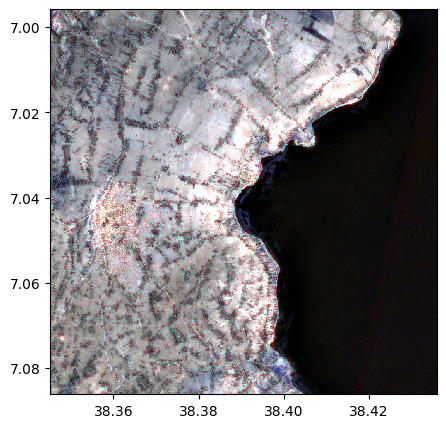

In [11]:
# colorcomp with 3 first bands
image.colorcomp()

<Figure size 640x480 with 0 Axes>

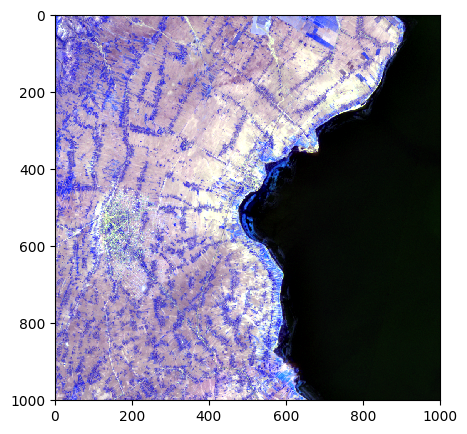

In [12]:
image.colorcomp(bands=['4','3','6'],extent = 'pixel')

<Figure size 640x480 with 0 Axes>

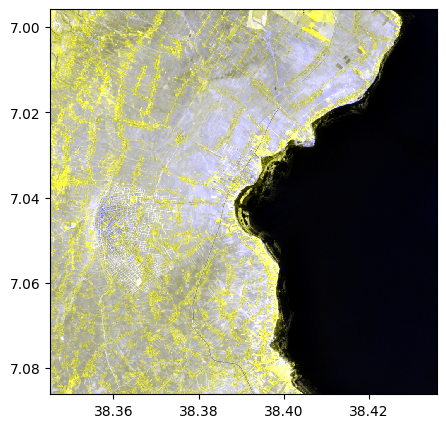

In [13]:
image.colorcomp(bands=[8,8,3])

Image saved in ./data/results/colorcomp/S2_colorcomp_R_G_B.tif


<Figure size 640x480 with 0 Axes>

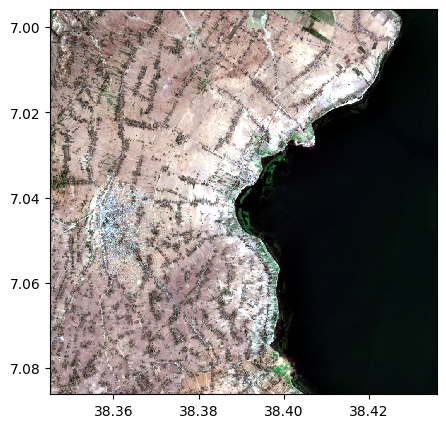

In [14]:
image_names.colorcomp(bands=["R","G","B"],dest_name='./data/results/colorcomp/S2_colorcomp_R_G_B.tif')

Image saved in ./data/results/colorcomp/test_colorcomp_R_G_NIR.tif


<Figure size 640x480 with 0 Axes>

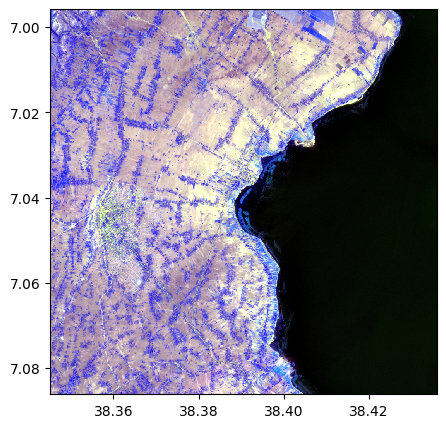

In [15]:
image_names.colorcomp(bands=["R","G","NIR"],dest_name='./data/results/colorcomp/test_colorcomp_R_G_NIR.tif')

## By bands

In [16]:
help(image.visu)

Help on method visu in module rastereasy.rastereasy:

visu(
    bands=None,
    title='',
    percentile=2,
    fig_size=(5, 5),
    cmap=None,
    colorbar=False,
    extent='latlon'
) method of rastereasy.rastereasy.Geoimage instance
    Visualize one or more bands of the image.

    This method provides a flexible way to display individual bands or multiple bands
    as separate figures. Unlike colorcomp, which creates RGB composites, this method
    displays each band in grayscale or with a specified colormap.

    Parameters
    ----------
    bands : str, list of str, or None, optional
        The bands to visualize:
        - If None: Displays all bands separately
        - If a string: Displays a single specified band
        - If a list: Displays each specified band separately
        Default is None.

    title : str, optional
        Base title for the visualization. Band names will be appended.
        Default is ''.

    percentile : int, optional
        Percentile value 

<Figure size 640x480 with 0 Axes>

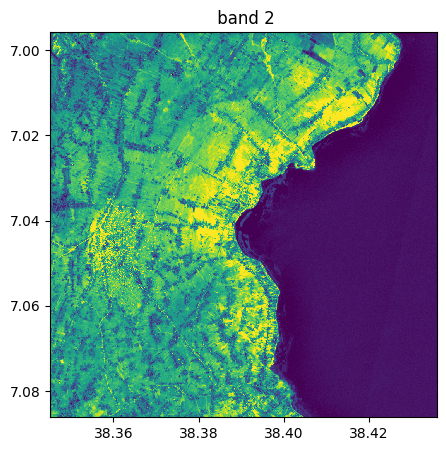

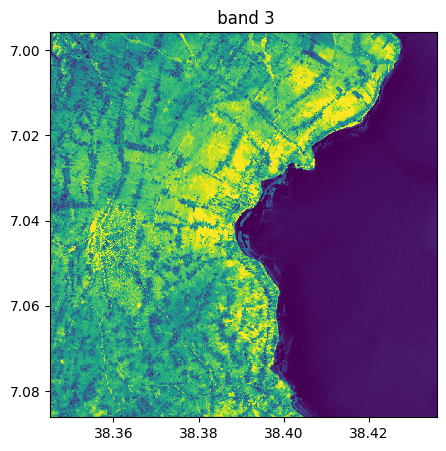

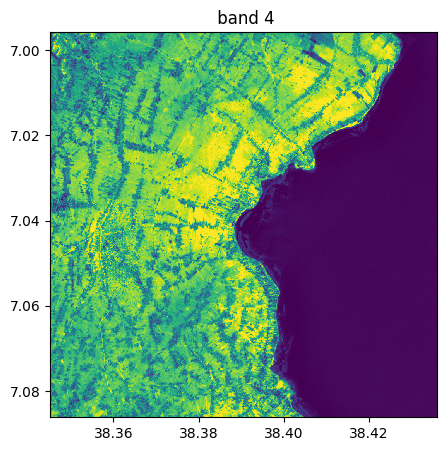

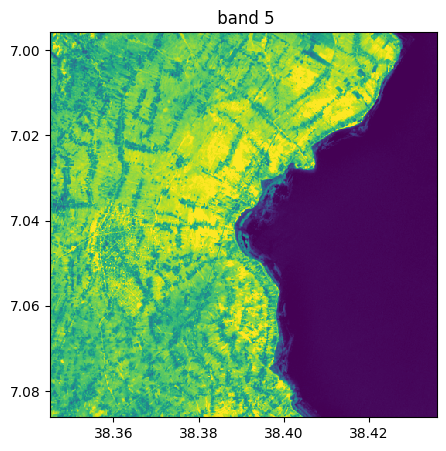

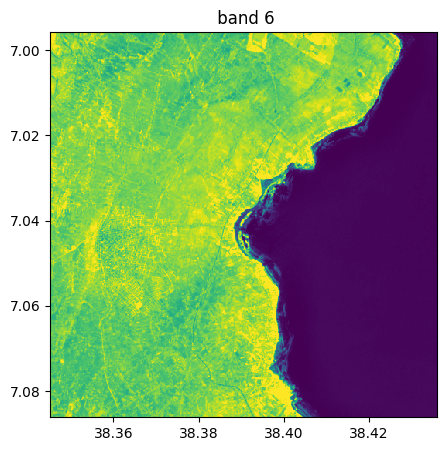

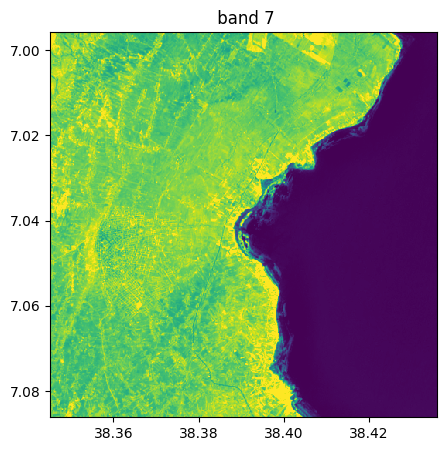

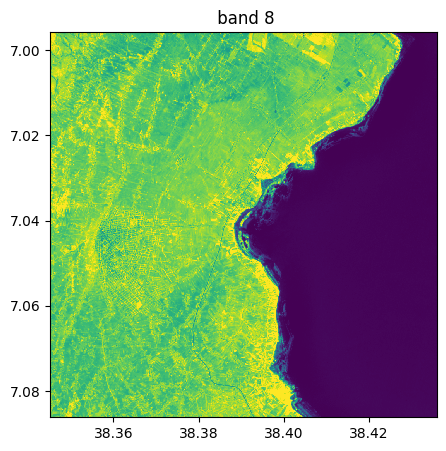

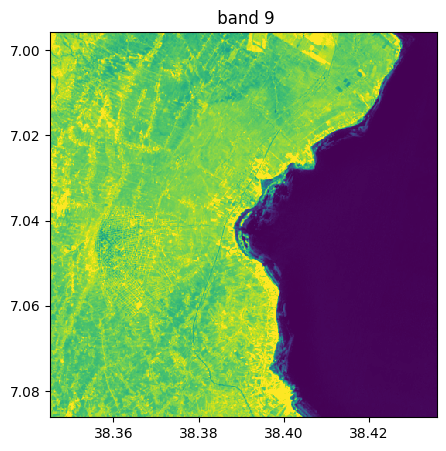

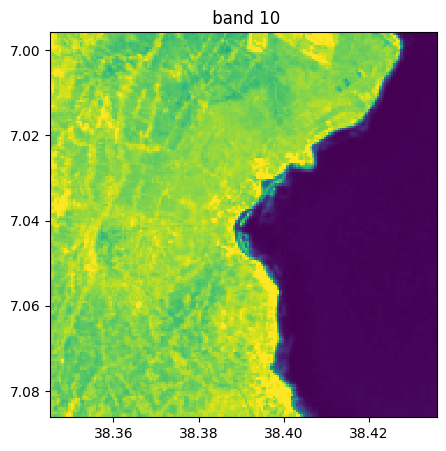

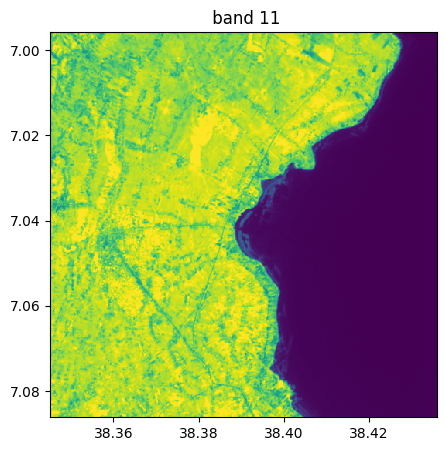

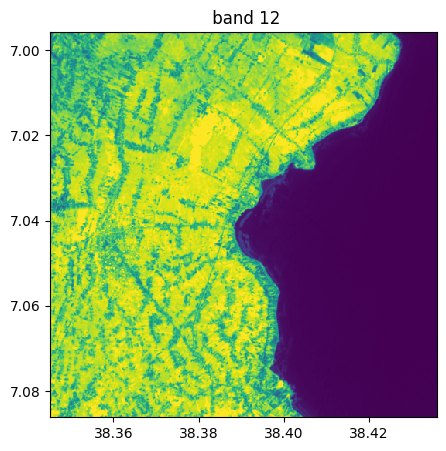

In [17]:
image.visu(fig_size=(5,5))

<Figure size 640x480 with 0 Axes>

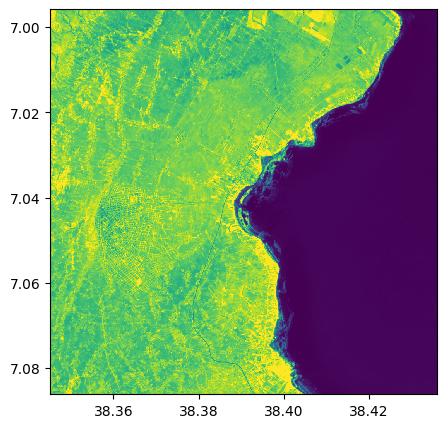

In [18]:
image.visu(bands=8)

<Figure size 640x480 with 0 Axes>

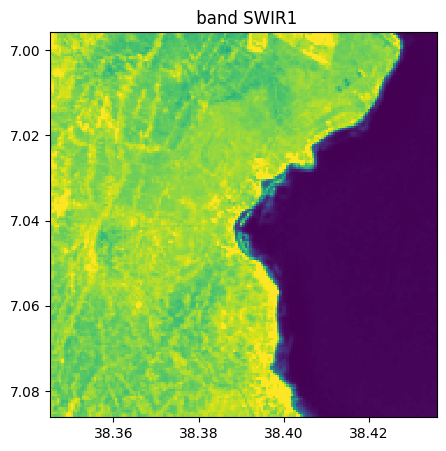

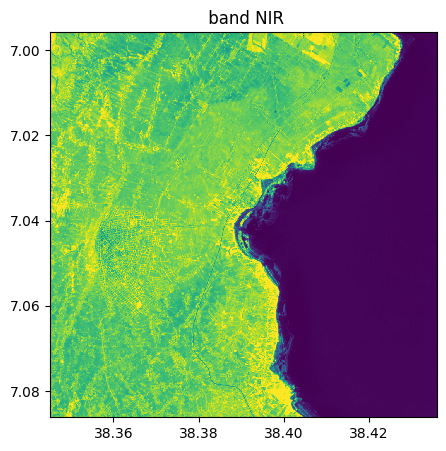

In [19]:
image_names.visu(["SWIR1","NIR"])

# Histograms

In [20]:
help(image.hist)

Help on method hist in module rastereasy.rastereasy:

hist(**args) method of rastereasy.rastereasy.Geoimage instance
    Display histograms of the image data.

    This method provides a flexible way to visualize the distribution of pixel values
    in one or more bands of the image. It supports various customization options for
    the histogram display.

    Parameters
    ----------
    bands : str, int, list, optional
        The bands to visualize. If not specified, all bands are included.
        This can be band names (e.g., ["NIR", "R", "G"]) or indices (e.g., [4, 3, 2]).

    superpose : bool, optional
        If True, all histograms are plotted on the same figure. If False (default),
        each band gets its own separate histogram figure.

    bins : int, optional
        The number of bins for computing the histogram. Default is 100.

    xmin : float, optional
        The minimum value to plot on the x-axis. Values lower than this won't be displayed.

    xmax : float, op

### By bands

<Figure size 640x480 with 0 Axes>

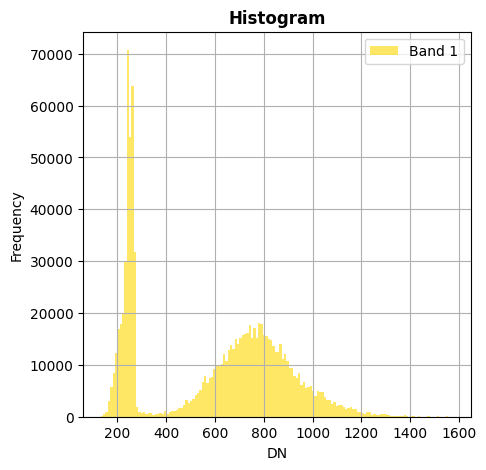

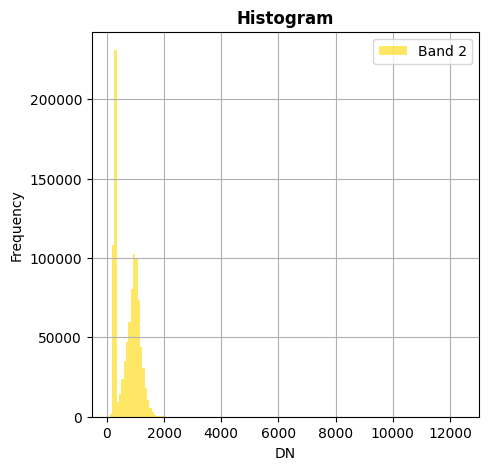

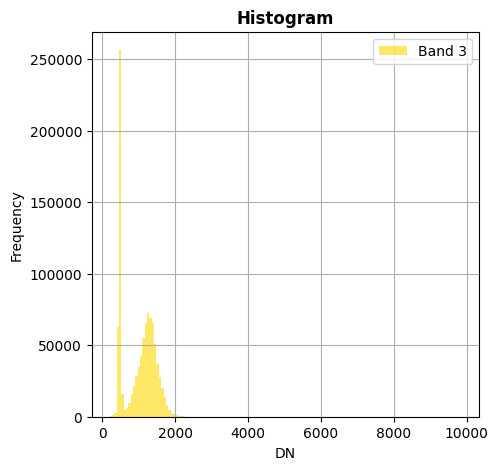

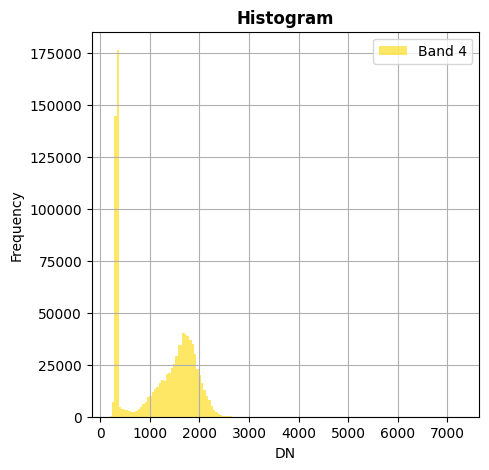

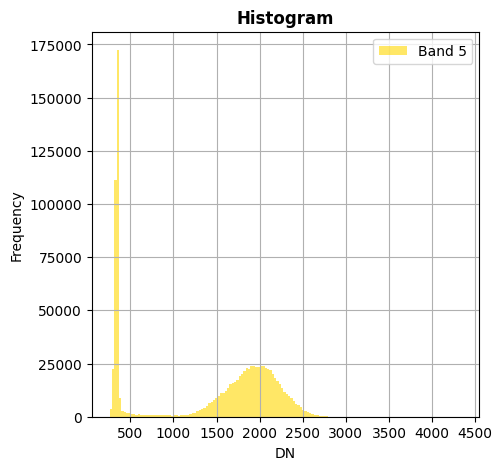

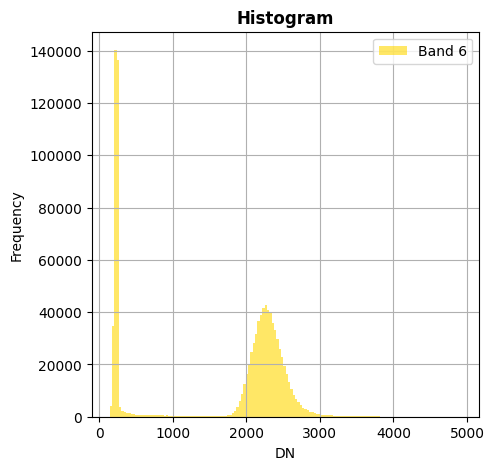

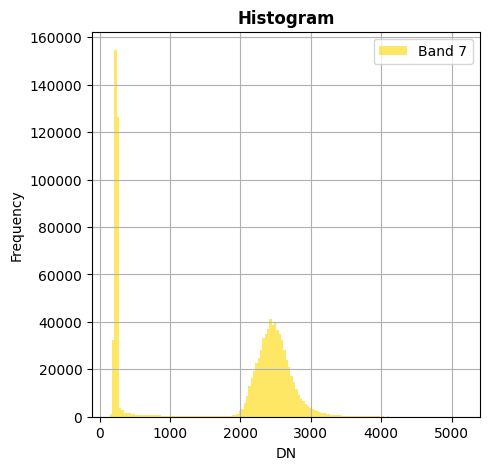

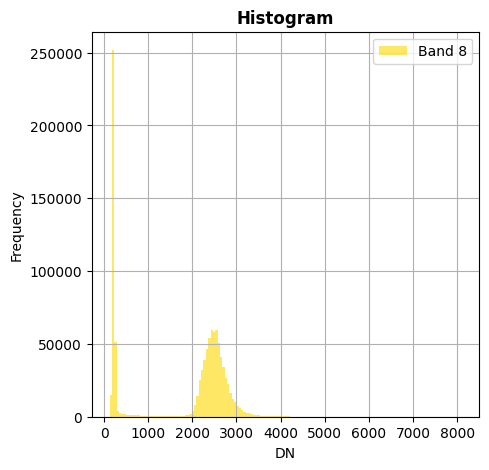

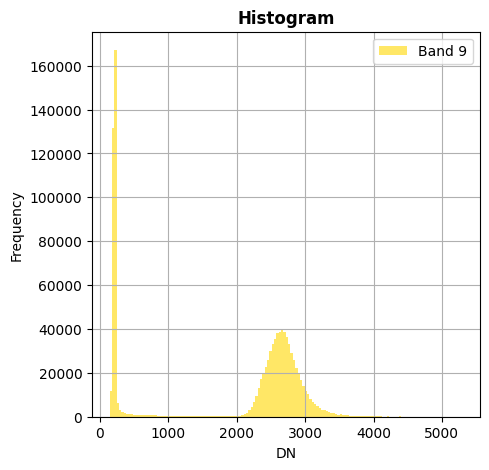

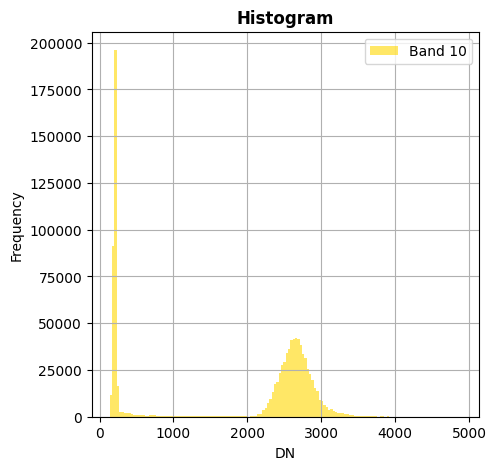

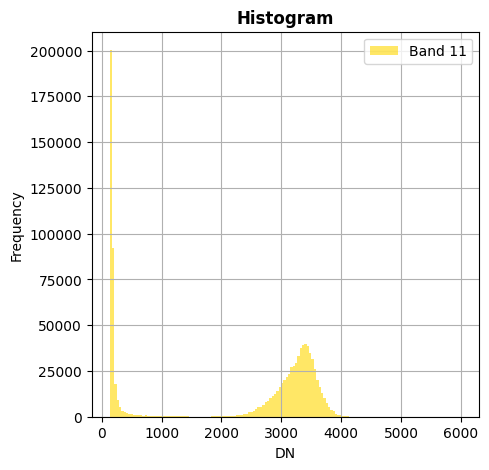

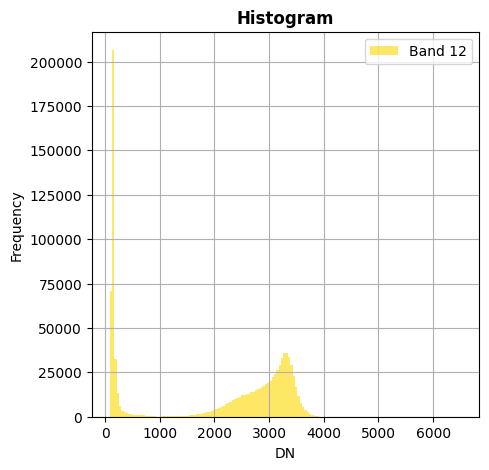

In [21]:
# Show all bands
image.hist(bins=150,histtype='stepfilled',fig_size=(5,5))

### Superposition of bands

<Figure size 640x480 with 0 Axes>

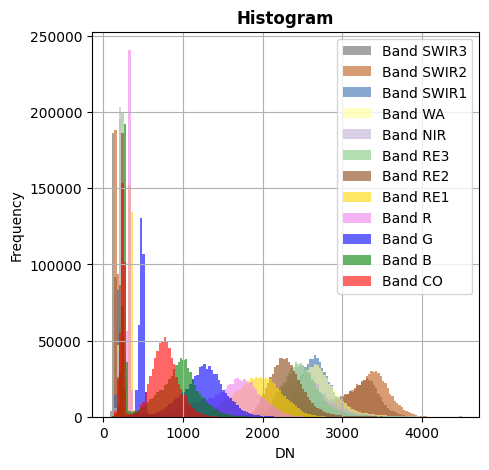

In [22]:
image_names.hist(bins=150,histtype='stepfilled',superpose=True, xmax=4500)

### Show only some bands

#### Without superposition

<Figure size 640x480 with 0 Axes>

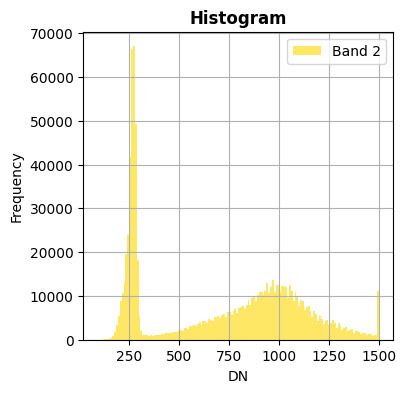

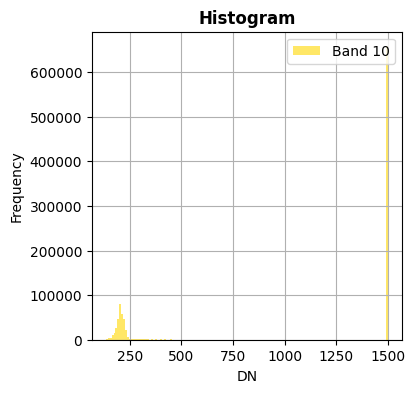

<Figure size 640x480 with 0 Axes>

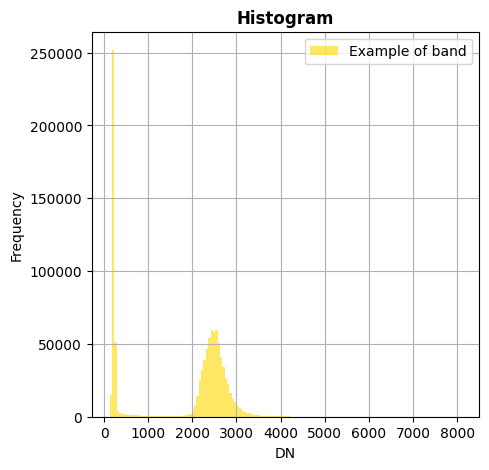

In [23]:
image.hist(bands=["2","10"],bins=150,histtype='stepfilled',fig_size=(4,4),xmax=1500)
image.hist(bands=8,bins=150,histtype='stepfilled',label='Example of band')

#### With superposition

<Figure size 640x480 with 0 Axes>

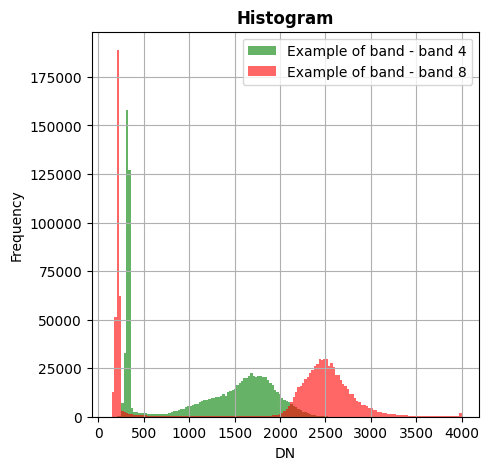

In [24]:
image.hist(bands=[8,4],bins=150,histtype='stepfilled',label='Example of band',superpose=True,xmin=0,xmax=4000)

<Figure size 640x480 with 0 Axes>

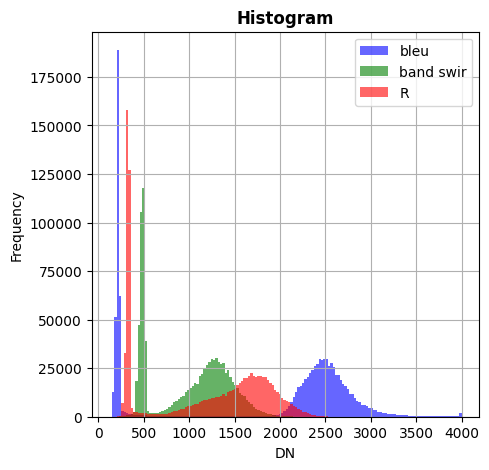

In [25]:
image_names.hist(bands=["R","G","NIR"],bins=150,histtype='stepfilled',superpose = True,label=["R","band swir","bleu"],xmax=4000)